# Thumb movement analysis

As a step up from [neuro-breakout](https://github.com/PerlinWarp/Neuro-Breakout) and trying to use the leap motion, 30 seconds of data has been gathered using the hand. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sample_points = np.array([
    [-13.35151005, 38.06658173,17.06526566, -9.59082985, -31.23623848, -53.12862396],
    [ 22.12649918, -18.7946701,  -70.41703796, -85.38266754, -76.4957428, -67.41526794],
    [141.71203613, 123.88239288, 134.22111511, 124.98007965, 120.3417511, 110.66632843]]
)

In [3]:
pred = np.random.rand(1,3) * 200
pred[0]

array([52.9555399 , 45.08546096, 24.20603067])

Thumb data was gathered on April 7th, at 16:30 using [this](https://github.com/PerlinWarp/NeuroLeap/commit/09cba969eb64a9da1b9b925f458650e208ae997f) commit.

Important parts of this commit was that data was gathered using:
```
m = MyoRaw(raw=False, filtered=True) # 50Hz Filtered Myo data

	def get_points():
		frame = controller.frame()
		hand = frame.hands.rightmost
		if not hand.is_valid: return None
		fingers = hand.fingers

		X = []
		Y = []
		Z = []

		# Add the position of the palms
		X.append(-1 *hand.palm_position.x)
		Y.append(hand.palm_position.y)
		Z.append(hand.palm_position.z)

		for finger in fingers:
			# Add finger tip positions
			X.append(-1 * finger.stabilized_tip_position.x)
			Y.append(finger.stabilized_tip_position.y)
			Z.append(finger.stabilized_tip_position.z) 
		return np.array([X, Z, Y])

```

Note the **stabilized tip positions** from the [documentation](https://developer-archive.leapmotion.com/documentation/python/api/Leap.Pointable.html#Leap.Pointable.stabilized_tip_position):
  
Smoothing and stabilization is performed in order to make this value more suitable for interaction with 2D content. The stabilized position lags behind the tip position by a variable amount, depending primarily on the speed of movement.


In [4]:
data = pd.read_csv("thumb_dataset_30.csv")

In [5]:
data.head()

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Palm_tip_x,Thumb_tip_x,...,Index_tip_y,Middle_tip_y,Ring_tip_y,Pinky_tip_y,Palm_tip_z,Thumb_tip_z,Index_tip_z,Middle_tip_z,Ring_tip_z,Pinky_tip_z
0,31,140,140,83,42,30,22,21,-18.167004,27.724434,...,-73.758804,-89.471649,-79.439949,-71.918144,144.981094,120.059906,133.536011,124.068176,119.804108,109.158684
1,30,154,193,89,53,31,21,21,-18.131498,27.894018,...,-73.705612,-89.391991,-79.372650,-71.772514,144.968231,120.200348,133.561554,124.106369,119.839752,109.234200
2,31,159,193,89,57,33,27,28,-18.109987,28.061665,...,-73.654808,-89.311295,-79.303879,-71.628952,144.953217,120.337166,133.585297,124.143944,119.874626,109.307076
3,33,152,177,96,58,34,27,30,-18.092686,28.231144,...,-73.604759,-89.231735,-79.234291,-71.495186,144.924377,120.473526,133.607986,124.180008,119.908142,109.373688
4,30,134,182,88,56,34,29,30,-18.089689,28.402817,...,-73.555382,-89.153038,-79.166466,-71.375092,144.883591,120.609833,133.629761,124.214531,119.939423,109.432350


<AxesSubplot:>

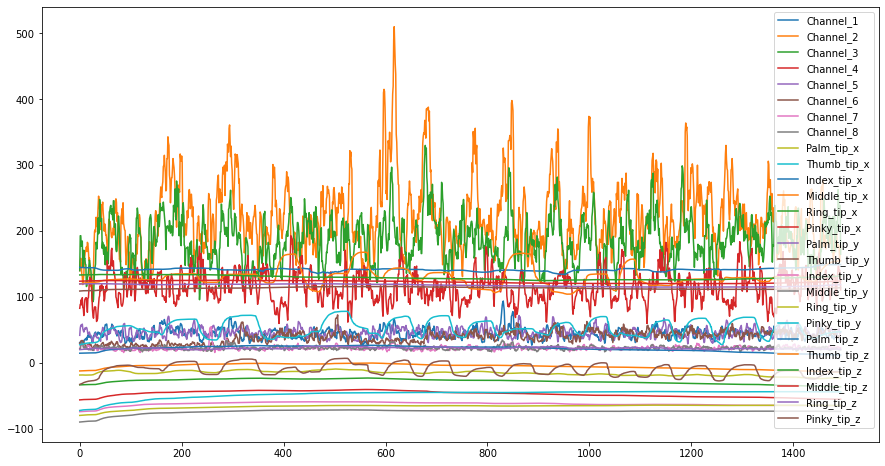

In [6]:
import matplotlib

matplotlib.rc('figure', figsize=(15, 8))

data.plot()

In [7]:
data.columns

Index(['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Palm_tip_x', 'Thumb_tip_x',
       'Index_tip_x', 'Middle_tip_x', 'Ring_tip_x', 'Pinky_tip_x',
       'Palm_tip_y', 'Thumb_tip_y', 'Index_tip_y', 'Middle_tip_y',
       'Ring_tip_y', 'Pinky_tip_y', 'Palm_tip_z', 'Thumb_tip_z', 'Index_tip_z',
       'Middle_tip_z', 'Ring_tip_z', 'Pinky_tip_z'],
      dtype='object')

<AxesSubplot:>

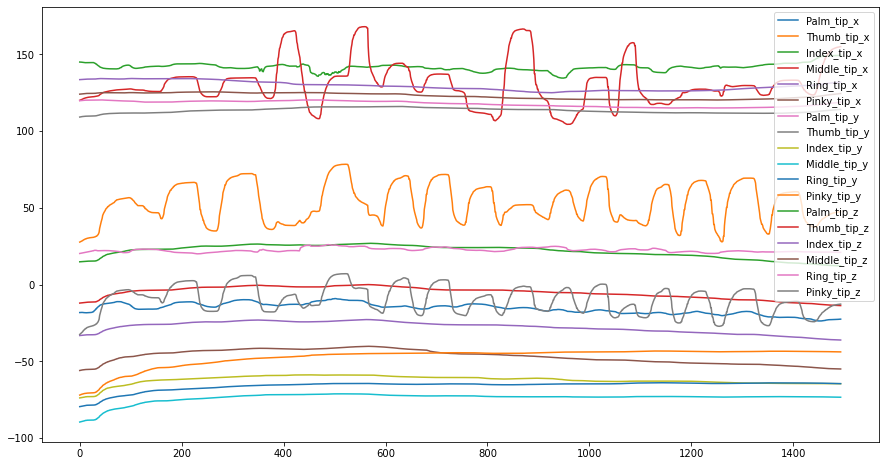

In [8]:
# Just considering the position data
pos_cols = ['Palm_tip_x', 'Thumb_tip_x',
       'Index_tip_x', 'Middle_tip_x', 'Ring_tip_x', 'Pinky_tip_x',
       'Palm_tip_y', 'Thumb_tip_y', 'Index_tip_y', 'Middle_tip_y',
       'Ring_tip_y', 'Pinky_tip_y', 'Palm_tip_z', 'Thumb_tip_z', 'Index_tip_z',
       'Middle_tip_z', 'Ring_tip_z', 'Pinky_tip_z']

df = data[pos_cols]
df.plot()

<AxesSubplot:>

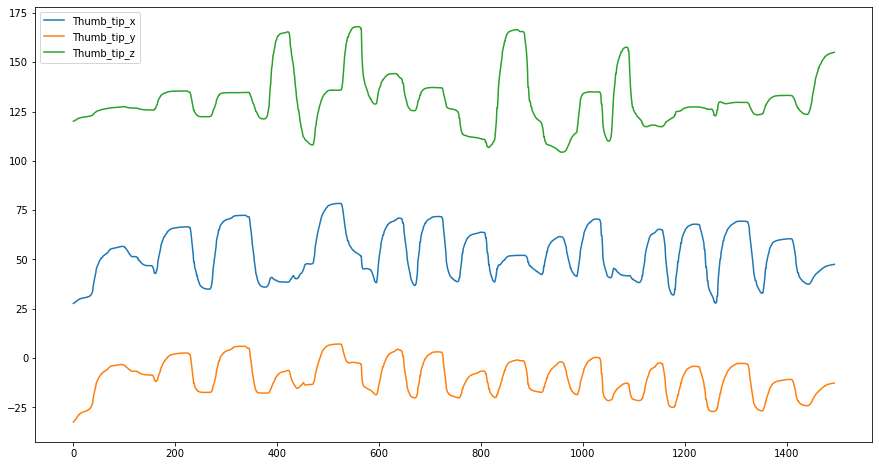

In [9]:
# Just considering the thumb
cols = ['Thumb_tip_x', 'Thumb_tip_y', 'Thumb_tip_z']
df = data[cols]
df.plot()

In [10]:
data.var()

Channel_1         61.155101
Channel_2       2981.336682
Channel_3       1252.896925
Channel_4        504.741145
Channel_5         47.501323
Channel_6         76.654646
Channel_7         10.194760
Channel_8          6.626612
Palm_tip_x        12.398094
Thumb_tip_x      155.309039
Index_tip_x       16.549957
Middle_tip_x      14.101624
Ring_tip_x        13.377871
Pinky_tip_x       19.356980
Palm_tip_y         1.829982
Thumb_tip_y       80.012689
Index_tip_y        7.472674
Middle_tip_y      10.030366
Ring_tip_y         9.116989
Pinky_tip_y       36.370002
Palm_tip_z         5.673768
Thumb_tip_z      197.256755
Index_tip_z        8.645685
Middle_tip_z       3.685747
Ring_tip_z         3.382069
Pinky_tip_z        2.506600
dtype: float64

By looking at the variance, we can make sure we didn't move the arm around too much.

In [11]:
data.columns

Index(['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Palm_tip_x', 'Thumb_tip_x',
       'Index_tip_x', 'Middle_tip_x', 'Ring_tip_x', 'Pinky_tip_x',
       'Palm_tip_y', 'Thumb_tip_y', 'Index_tip_y', 'Middle_tip_y',
       'Ring_tip_y', 'Pinky_tip_y', 'Palm_tip_z', 'Thumb_tip_z', 'Index_tip_z',
       'Middle_tip_z', 'Ring_tip_z', 'Pinky_tip_z'],
      dtype='object')

From now on, I will only use sEMG, thumb and palm data. The palm data is to use as a reference. 

<AxesSubplot:>

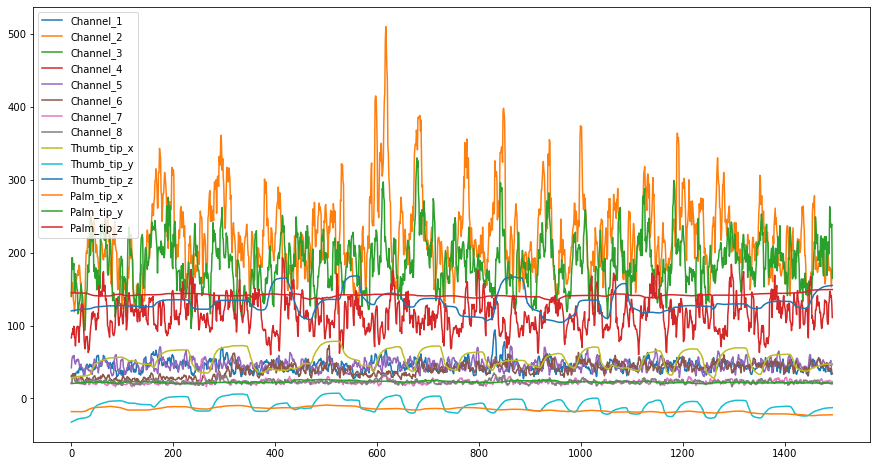

In [12]:
# Just considering the data we care about
cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8','Thumb_tip_x', 'Thumb_tip_y', 'Thumb_tip_z', 
       'Palm_tip_x', 'Palm_tip_y', 'Palm_tip_z']
df = data[cols]
df.plot()

[Text(0.5, 1.0, 'sEMG and Leap corrolations')]

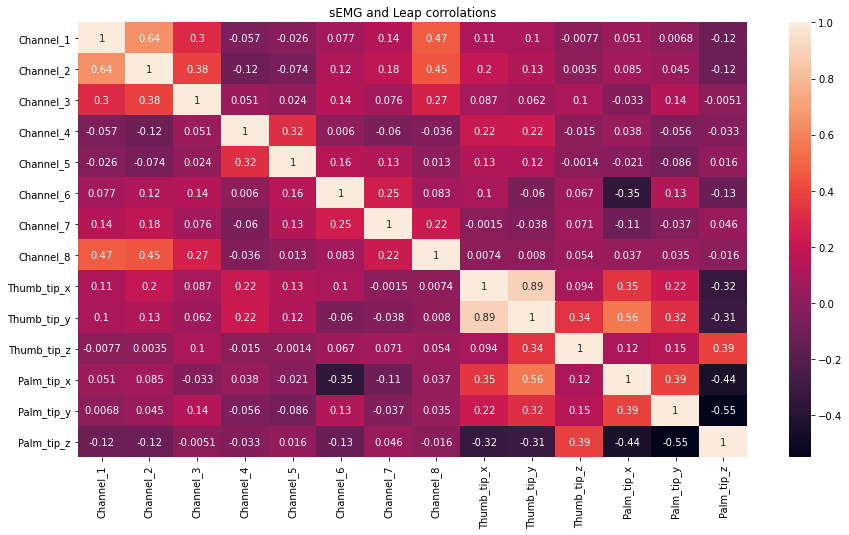

In [13]:
sns.heatmap(df.corr(), annot=True).set(title="sEMG and Leap corrolations")

# Feature engineering: relative positions

In [14]:
df.columns

Index(['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Thumb_tip_x', 'Thumb_tip_y',
       'Thumb_tip_z', 'Palm_tip_x', 'Palm_tip_y', 'Palm_tip_z'],
      dtype='object')

<ipython-input-15-69a715ef4de4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rel["Thumb_r_tip_x"] = df_rel["Thumb_tip_x"] - df_rel['Palm_tip_x']
<ipython-input-15-69a715ef4de4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rel["Thumb_r_tip_y"] = df_rel["Thumb_tip_y"] - df_rel['Palm_tip_y']
<ipython-input-15-69a715ef4de4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

[Text(0.5, 1.0, 'sEMG and Leap rel corrolations')]

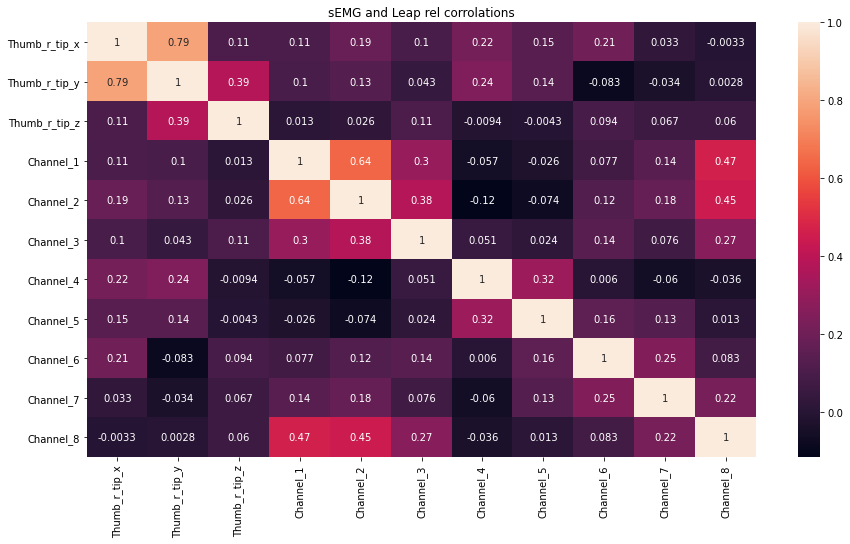

In [15]:
df_rel = df
df_rel["Thumb_r_tip_x"] = df_rel["Thumb_tip_x"] - df_rel['Palm_tip_x']
df_rel["Thumb_r_tip_y"] = df_rel["Thumb_tip_y"] - df_rel['Palm_tip_y']
df_rel["Thumb_r_tip_z"] = df_rel["Thumb_tip_z"] - df_rel['Palm_tip_z']

df_rel = df_rel[['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z',
                 'Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
                 'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8']]

sns.heatmap(df_rel.corr(), annot=True).set(title="sEMG and Leap rel corrolations")

[Text(0.5, 1.0, 'sEMG and Leap rel corrolations')]

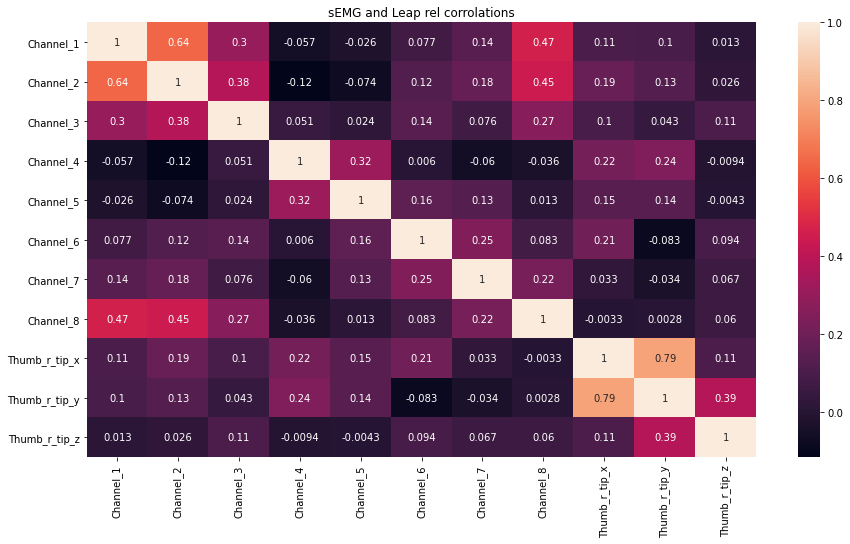

In [16]:
df_rel = df_rel[['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
                 'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8', 
                 'Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z']]

sns.heatmap(df_rel.corr(), annot=True).set(title="sEMG and Leap rel corrolations")

# Making some baseline ML

## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y_cols = ['Thumb_tip_x', 'Thumb_tip_y','Thumb_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
          'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8']

y = df['Thumb_tip_x']
X = df[x_cols]
train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)

In [19]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error X: " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error X: 8.62562239743809


In [20]:
y_cols = ['Thumb_tip_x', 'Thumb_tip_y','Thumb_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
          'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8']

y = df['Thumb_tip_y']
X = df[x_cols]
train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error Y: " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error Y: 5.91104741173393


In [21]:
y_cols = ['Thumb_tip_x', 'Thumb_tip_y','Thumb_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
          'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8']

y = df['Thumb_tip_z']
X = df[x_cols]
train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error Z: " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error Z: 9.697185251164564


# Multivariate regression

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [32]:
y = df[y_cols]
X = df[x_cols]
train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)

In [33]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(8, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(3, kernel_initializer='normal'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_13 (Dense)             (None, 256)               2304      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 771       
Total params: 68,939
Trainable params: 68,939
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = NN_model.fit(train_X, train_y, epochs=500, batch_size=32, validation_split = 0.2)

Epoch 1/500
28/28 [==============================] - 0s 3ms/step - loss: 4555.5835 - mean_absolute_error: 50.8688 - val_loss: 350.3539 - val_mean_absolute_error: 14.3799
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 406.1124 - mean_absolute_error: 15.0173 - val_loss: 242.9368 - val_mean_absolute_error: 11.6824
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 251.6331 - mean_absolute_error: 12.0437 - val_loss: 231.5257 - val_mean_absolute_error: 11.4180
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 235.9698 - mean_absolute_error: 11.6765 - val_loss: 228.6763 - val_mean_absolute_error: 11.3916
Epoch 5/500
28/28 [==============================] - 0s 2ms/step - loss: 231.4073 - mean_absolute_error: 11.5714 - val_loss: 225.4008 - val_mean_absolute_error: 11.2689
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 227.8447 - mean_absolute_error: 11.5434 - val_loss: 218.9198 - val_mean_absolute_

28/28 [==============================] - 0s 1ms/step - loss: 169.9902 - mean_absolute_error: 10.1930 - val_loss: 167.5296 - val_mean_absolute_error: 10.0712
Epoch 50/500
28/28 [==============================] - 0s 1ms/step - loss: 179.5558 - mean_absolute_error: 10.4754 - val_loss: 184.2734 - val_mean_absolute_error: 10.6402
Epoch 51/500
28/28 [==============================] - 0s 1ms/step - loss: 175.1228 - mean_absolute_error: 10.3690 - val_loss: 188.1276 - val_mean_absolute_error: 10.7564
Epoch 52/500
28/28 [==============================] - 0s 2ms/step - loss: 174.3907 - mean_absolute_error: 10.2919 - val_loss: 167.4179 - val_mean_absolute_error: 10.1133
Epoch 53/500
28/28 [==============================] - 0s 2ms/step - loss: 169.9525 - mean_absolute_error: 10.2132 - val_loss: 168.4878 - val_mean_absolute_error: 10.1167
Epoch 54/500
28/28 [==============================] - 0s 2ms/step - loss: 170.7638 - mean_absolute_error: 10.2515 - val_loss: 165.7158 - val_mean_absolute_error: 1

28/28 [==============================] - 0s 1ms/step - loss: 157.2253 - mean_absolute_error: 9.8657 - val_loss: 151.7561 - val_mean_absolute_error: 9.6017
Epoch 98/500
28/28 [==============================] - 0s 2ms/step - loss: 159.5970 - mean_absolute_error: 9.9242 - val_loss: 150.5548 - val_mean_absolute_error: 9.5077
Epoch 99/500
28/28 [==============================] - 0s 1ms/step - loss: 156.1048 - mean_absolute_error: 9.8019 - val_loss: 155.3877 - val_mean_absolute_error: 9.7193
Epoch 100/500
28/28 [==============================] - 0s 2ms/step - loss: 151.2787 - mean_absolute_error: 9.6866 - val_loss: 154.5854 - val_mean_absolute_error: 9.7600
Epoch 101/500
28/28 [==============================] - 0s 1ms/step - loss: 154.9775 - mean_absolute_error: 9.7821 - val_loss: 154.2644 - val_mean_absolute_error: 9.6539
Epoch 102/500
28/28 [==============================] - 0s 1ms/step - loss: 153.2989 - mean_absolute_error: 9.7351 - val_loss: 148.8126 - val_mean_absolute_error: 9.4603
Ep

28/28 [==============================] - 0s 1ms/step - loss: 137.5275 - mean_absolute_error: 9.3197 - val_loss: 144.1960 - val_mean_absolute_error: 9.5113
Epoch 146/500
28/28 [==============================] - 0s 1ms/step - loss: 138.7122 - mean_absolute_error: 9.2653 - val_loss: 156.1629 - val_mean_absolute_error: 9.7915
Epoch 147/500
28/28 [==============================] - 0s 1ms/step - loss: 138.6274 - mean_absolute_error: 9.3644 - val_loss: 145.2210 - val_mean_absolute_error: 9.5815
Epoch 148/500
28/28 [==============================] - 0s 2ms/step - loss: 136.1885 - mean_absolute_error: 9.2837 - val_loss: 146.9765 - val_mean_absolute_error: 9.6105
Epoch 149/500
28/28 [==============================] - 0s 2ms/step - loss: 136.6061 - mean_absolute_error: 9.3041 - val_loss: 140.8338 - val_mean_absolute_error: 9.3613
Epoch 150/500
28/28 [==============================] - 0s 1ms/step - loss: 137.7580 - mean_absolute_error: 9.2901 - val_loss: 137.9471 - val_mean_absolute_error: 9.1192


28/28 [==============================] - 0s 2ms/step - loss: 131.5921 - mean_absolute_error: 9.1781 - val_loss: 134.4527 - val_mean_absolute_error: 9.0990
Epoch 194/500
28/28 [==============================] - 0s 2ms/step - loss: 139.1055 - mean_absolute_error: 9.3460 - val_loss: 132.0229 - val_mean_absolute_error: 9.0214
Epoch 195/500
28/28 [==============================] - 0s 2ms/step - loss: 131.0847 - mean_absolute_error: 9.1003 - val_loss: 136.5421 - val_mean_absolute_error: 9.2772
Epoch 196/500
28/28 [==============================] - 0s 2ms/step - loss: 130.2762 - mean_absolute_error: 9.0766 - val_loss: 149.8379 - val_mean_absolute_error: 9.9009
Epoch 197/500
28/28 [==============================] - 0s 2ms/step - loss: 131.9077 - mean_absolute_error: 9.1873 - val_loss: 129.9370 - val_mean_absolute_error: 8.9124
Epoch 198/500
28/28 [==============================] - 0s 2ms/step - loss: 130.1430 - mean_absolute_error: 9.0689 - val_loss: 132.7013 - val_mean_absolute_error: 9.1762


28/28 [==============================] - 0s 2ms/step - loss: 125.7020 - mean_absolute_error: 8.9211 - val_loss: 139.0361 - val_mean_absolute_error: 9.4480
Epoch 242/500
28/28 [==============================] - 0s 2ms/step - loss: 127.6304 - mean_absolute_error: 9.0191 - val_loss: 131.4118 - val_mean_absolute_error: 9.1574
Epoch 243/500
28/28 [==============================] - 0s 2ms/step - loss: 125.4900 - mean_absolute_error: 8.9355 - val_loss: 134.4554 - val_mean_absolute_error: 9.0453
Epoch 244/500
28/28 [==============================] - 0s 1ms/step - loss: 127.1865 - mean_absolute_error: 8.9739 - val_loss: 126.8396 - val_mean_absolute_error: 8.9078
Epoch 245/500
28/28 [==============================] - 0s 1ms/step - loss: 128.2732 - mean_absolute_error: 9.0032 - val_loss: 147.7260 - val_mean_absolute_error: 9.7195
Epoch 246/500
28/28 [==============================] - 0s 2ms/step - loss: 132.2424 - mean_absolute_error: 9.1894 - val_loss: 138.2121 - val_mean_absolute_error: 9.5013


28/28 [==============================] - 0s 2ms/step - loss: 123.8462 - mean_absolute_error: 8.8527 - val_loss: 131.3785 - val_mean_absolute_error: 8.9879
Epoch 290/500
28/28 [==============================] - 0s 2ms/step - loss: 122.2241 - mean_absolute_error: 8.7975 - val_loss: 129.6304 - val_mean_absolute_error: 9.0752
Epoch 291/500
28/28 [==============================] - 0s 2ms/step - loss: 122.2102 - mean_absolute_error: 8.8439 - val_loss: 125.3496 - val_mean_absolute_error: 8.7629
Epoch 292/500
28/28 [==============================] - 0s 2ms/step - loss: 124.2186 - mean_absolute_error: 8.8834 - val_loss: 133.3760 - val_mean_absolute_error: 9.2815
Epoch 293/500
28/28 [==============================] - 0s 2ms/step - loss: 124.0494 - mean_absolute_error: 8.8776 - val_loss: 129.7073 - val_mean_absolute_error: 9.0811
Epoch 294/500
28/28 [==============================] - 0s 2ms/step - loss: 122.1179 - mean_absolute_error: 8.8013 - val_loss: 124.7540 - val_mean_absolute_error: 8.7594


28/28 [==============================] - 0s 2ms/step - loss: 124.4188 - mean_absolute_error: 8.8897 - val_loss: 127.2869 - val_mean_absolute_error: 8.9653
Epoch 338/500
28/28 [==============================] - 0s 2ms/step - loss: 121.6334 - mean_absolute_error: 8.7639 - val_loss: 123.3048 - val_mean_absolute_error: 8.7722
Epoch 339/500
28/28 [==============================] - 0s 2ms/step - loss: 120.6880 - mean_absolute_error: 8.7391 - val_loss: 127.0681 - val_mean_absolute_error: 8.9553
Epoch 340/500
28/28 [==============================] - 0s 2ms/step - loss: 119.7505 - mean_absolute_error: 8.6957 - val_loss: 129.8949 - val_mean_absolute_error: 8.9393
Epoch 341/500
28/28 [==============================] - 0s 2ms/step - loss: 120.6259 - mean_absolute_error: 8.7415 - val_loss: 127.3890 - val_mean_absolute_error: 8.7655
Epoch 342/500
28/28 [==============================] - 0s 2ms/step - loss: 121.5967 - mean_absolute_error: 8.7865 - val_loss: 124.3314 - val_mean_absolute_error: 8.7683


28/28 [==============================] - 0s 2ms/step - loss: 118.9812 - mean_absolute_error: 8.6755 - val_loss: 121.4409 - val_mean_absolute_error: 8.6617
Epoch 386/500
28/28 [==============================] - 0s 2ms/step - loss: 118.8760 - mean_absolute_error: 8.6817 - val_loss: 121.6618 - val_mean_absolute_error: 8.6768
Epoch 387/500
28/28 [==============================] - 0s 2ms/step - loss: 118.5752 - mean_absolute_error: 8.6290 - val_loss: 129.2848 - val_mean_absolute_error: 9.0266
Epoch 388/500
28/28 [==============================] - 0s 2ms/step - loss: 120.3377 - mean_absolute_error: 8.7298 - val_loss: 122.8096 - val_mean_absolute_error: 8.6657
Epoch 389/500
28/28 [==============================] - 0s 2ms/step - loss: 117.4917 - mean_absolute_error: 8.6387 - val_loss: 121.8589 - val_mean_absolute_error: 8.5998
Epoch 390/500
28/28 [==============================] - 0s 1ms/step - loss: 119.5793 - mean_absolute_error: 8.6500 - val_loss: 121.2690 - val_mean_absolute_error: 8.7102


28/28 [==============================] - 0s 1ms/step - loss: 124.4841 - mean_absolute_error: 8.8240 - val_loss: 125.3333 - val_mean_absolute_error: 8.8246
Epoch 434/500
28/28 [==============================] - 0s 2ms/step - loss: 118.2281 - mean_absolute_error: 8.6594 - val_loss: 123.1418 - val_mean_absolute_error: 8.7137
Epoch 435/500
28/28 [==============================] - 0s 1ms/step - loss: 117.8629 - mean_absolute_error: 8.6565 - val_loss: 122.8353 - val_mean_absolute_error: 8.7512
Epoch 436/500
28/28 [==============================] - 0s 1ms/step - loss: 122.5421 - mean_absolute_error: 8.7487 - val_loss: 124.6053 - val_mean_absolute_error: 8.7916
Epoch 437/500
28/28 [==============================] - 0s 1ms/step - loss: 121.9448 - mean_absolute_error: 8.7649 - val_loss: 128.7019 - val_mean_absolute_error: 9.0593
Epoch 438/500
28/28 [==============================] - 0s 1ms/step - loss: 121.4100 - mean_absolute_error: 8.7609 - val_loss: 121.8435 - val_mean_absolute_error: 8.6658


28/28 [==============================] - 0s 2ms/step - loss: 117.9297 - mean_absolute_error: 8.5636 - val_loss: 123.4458 - val_mean_absolute_error: 8.8175
Epoch 482/500
28/28 [==============================] - 0s 1ms/step - loss: 117.5910 - mean_absolute_error: 8.6262 - val_loss: 130.0832 - val_mean_absolute_error: 9.0965
Epoch 483/500
28/28 [==============================] - 0s 1ms/step - loss: 116.6954 - mean_absolute_error: 8.6089 - val_loss: 123.1454 - val_mean_absolute_error: 8.7855
Epoch 484/500
28/28 [==============================] - 0s 1ms/step - loss: 116.6213 - mean_absolute_error: 8.6057 - val_loss: 125.1740 - val_mean_absolute_error: 8.8374
Epoch 485/500
28/28 [==============================] - 0s 1ms/step - loss: 117.8128 - mean_absolute_error: 8.6120 - val_loss: 131.1483 - val_mean_absolute_error: 9.0208
Epoch 486/500
28/28 [==============================] - 0s 1ms/step - loss: 117.1027 - mean_absolute_error: 8.5663 - val_loss: 134.0337 - val_mean_absolute_error: 9.2835


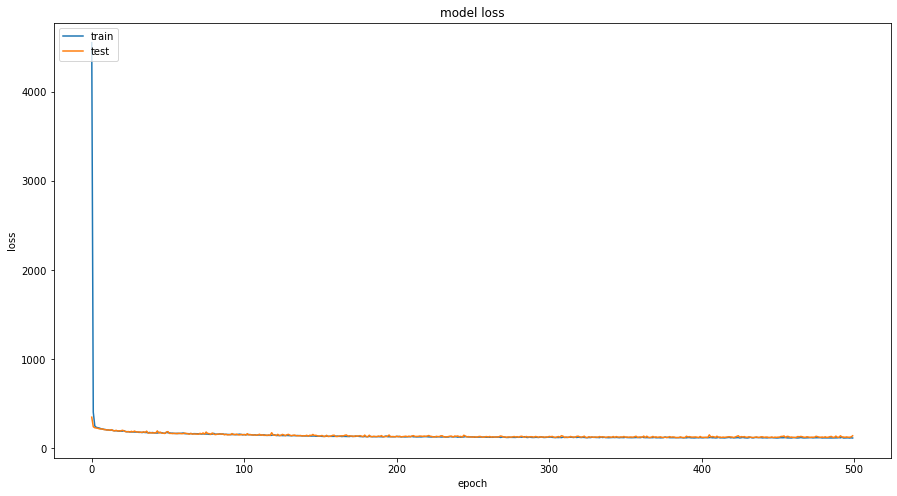

In [36]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
# Evaluate the model on the test data
loss, mea = NN_model.evaluate(test_X, test_y)
loss**0.5, mea

12/12 [==============================] - 0s 1ms/step - loss: 135.1937 - mean_absolute_error: 9.2590


(11.627281703372045, 9.258988380432129)

In [38]:
sample_input = np.array([ 59, 194, 176, 117,  41,  27,  23,  23]).reshape(1,8)
sample_input.shape
NN_model.predict(sample_input)

array([[ 55.298634,  -5.604813, 134.05652 ]], dtype=float32)

In [86]:
NN_model.save("../models/BenchmarkNN.h5")

In [88]:
# Predict from the live data
from keras.models import load_model

model = load_model('../models/BenchmarkNN.h5')
model.predict(sample_input)

array([[ 51.149292 ,  -7.4921813, 127.01072  ]], dtype=float32)

In [90]:
np.array([[ 51.149292 ,  -7.4921813, 127.01072  ]], dtype='float32')

array([[ 51.149292 ,  -7.4921813, 127.01072  ]], dtype=float32)